In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('mpg_raw.csv')

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.shape

(398, 9)

In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null object
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
#separating categorical and numrical feature
cat=list(df.select_dtypes(include=['object']).columns)
num=list(df.select_dtypes(exclude=['object']).columns)
print('categorical features',cat)
print('numerical features',num)

categorical features ['origin', 'name']
numerical features ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']


In [9]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [10]:
#since the cylinder and model year have very less unique value so we can make it to categorical variable 
cat.extend(['cylinders', 'model_year'])
num.remove('cylinders')
num.remove('model_year')

print(f'categorical variables:  {cat}')
print(f'numerical variables:  {num}')

categorical variables:  ['origin', 'name', 'cylinders', 'model_year']
numerical variables:  ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']


In [11]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [12]:
#checking the proportion of nan value in horsepower
6/len(df)

0.01507537688442211

In [13]:
#since proportion of missing value is very less so we can drop that rows
df=df.dropna(how='any',axis=0)

In [14]:
df.shape

(392, 9)

In [15]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [16]:
#grouping same feature
df=pd.concat((df[cat],df[num]),axis=1)
df.head()

,origin,name,cylinders,model_year,mpg,displacement,horsepower,weight,acceleration
0,usa,chevrolet chevelle malibu,8,70,18.0,307.0,130.0,3504,12.0
1,usa,buick skylark 320,8,70,15.0,350.0,165.0,3693,11.5
2,usa,plymouth satellite,8,70,18.0,318.0,150.0,3436,11.0
3,usa,amc rebel sst,8,70,16.0,304.0,150.0,3433,12.0
4,usa,ford torino,8,70,17.0,302.0,140.0,3449,10.5


In [17]:
#saving this cleaned df to csv
df.to_csv('mpg_clean.csv',index=False)

Ananlysis of categorical features

In [18]:
data=pd.read_csv("mpg_clean.csv")

In [19]:
data.head()

,origin,name,cylinders,model_year,mpg,displacement,horsepower,weight,acceleration
0,usa,chevrolet chevelle malibu,8,70,18.0,307.0,130.0,3504,12.0
1,usa,buick skylark 320,8,70,15.0,350.0,165.0,3693,11.5
2,usa,plymouth satellite,8,70,18.0,318.0,150.0,3436,11.0
3,usa,amc rebel sst,8,70,16.0,304.0,150.0,3433,12.0
4,usa,ford torino,8,70,17.0,302.0,140.0,3449,10.5


In [20]:
data_cat=data.loc[:,'origin':'model_year']
data_cat.head()

,origin,name,cylinders,model_year
0,usa,chevrolet chevelle malibu,8,70
1,usa,buick skylark 320,8,70
2,usa,plymouth satellite,8,70
3,usa,amc rebel sst,8,70
4,usa,ford torino,8,70


In [21]:
#removing extra space if any
for col in ['origin','name']:
    data_cat[col]=data_cat[col].apply(lambda x:' '.join(x.split()))

In [22]:
data_cat.head()

,origin,name,cylinders,model_year
0,usa,chevrolet chevelle malibu,8,70
1,usa,buick skylark 320,8,70
2,usa,plymouth satellite,8,70
3,usa,amc rebel sst,8,70
4,usa,ford torino,8,70


In [23]:
#defining mpg_level on the basis of low,medium,high
data_cat['mpg_level']=data['mpg'].apply(lambda x:'low' if x<17 else 'high' if x>29 else 'medium')
cat.append('mpg_level')
print(f'categorical variables:  {cat}')

categorical variables:  ['origin', 'name', 'cylinders', 'model_year', 'mpg_level']


In [24]:
data_cat.describe()

,cylinders,model_year
count,392.000000,392.000000
mean,5.471939,75.979592
std,1.705783,3.683737
min,3.000000,70.000000
25%,4.000000,73.000000
50%,4.000000,76.000000
75%,8.000000,79.000000
max,8.000000,82.000000


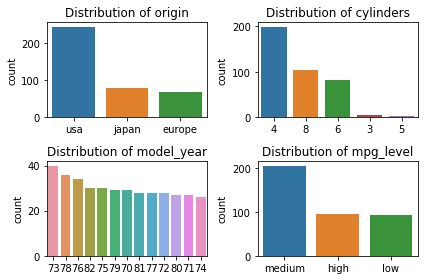

In [25]:
for i,cat in enumerate(data_cat.drop(['name'], axis=1).columns):
    ax = plt.subplot(2,2,i+1)
    sns.countplot(data_cat[cat], order=data_cat[cat].value_counts().index)
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {cat}')
    plt.tight_layout()

plt.show()

In [26]:
count_1=0
count_2=0
count_3=0
for i in range(len(data_cat)):
    if data_cat['origin'][i]=='usa':
        count_1+=1
    if data_cat['cylinders'][i]==4:
        count_2+=1
    if data_cat['mpg_level'][i]=='medium':
        count_3+=1
print('USA has contribution of-',count_1/len(data_cat))     
print('Cylinder 4 has contribution of-',count_2/len(data_cat))     
print('MPG medium level contribution is-',count_3/len(data_cat))     

USA has contribution of- 0.625
Cylinder 4 has contribution of- 0.5076530612244898
MPG medium level contribution is- 0.5229591836734694


Insights

1.Origin is highly imbalanced as USA alone has a contribution of 62.5%

2.Cylinders are also highly imbalanced as 4 alone has a contribution of 50.77% and rest percentage distribted among other cylinders

3.Since mpg_level are defined by us and medium level has higher contribution as compared to other due to large range.

In [27]:
#Dealing with car names as car names start with company names which may be useful
data_cat['car_company']=data_cat['name'].apply(lambda x:x.split()[0])
data_cat['car_name']=data_cat['name'].apply(lambda x:' '.join(x.split()[1:]))
data_cat=data_cat.drop(['name'],axis=1)
# cat.append('car_company')
# cat.append('car_name')
# cat.remove('name')
data_cat.head()

,origin,cylinders,model_year,mpg_level,car_company,car_name
0,usa,8,70,medium,chevrolet,chevelle malibu
1,usa,8,70,low,buick,skylark 320
2,usa,8,70,medium,plymouth,satellite
3,usa,8,70,low,amc,rebel sst
4,usa,8,70,medium,ford,torino


In [28]:
data_cat['car_company'].nunique()

37

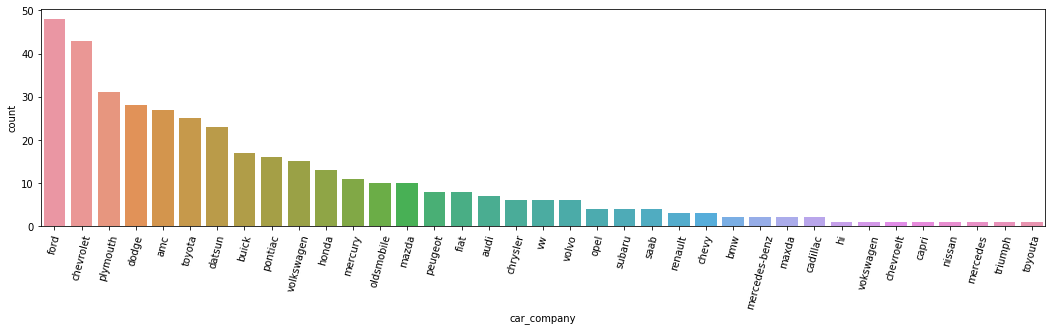

In [29]:
fig=plt.figure(1,(18,4))
ax1=plt.subplot(1,1,1)
sns.countplot(x='car_company',data=data_cat,order=data_cat['car_company'].value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=75)
plt.show()

By seeing the above graph we can get insight that ford and chevrolet alone comprises of 23%

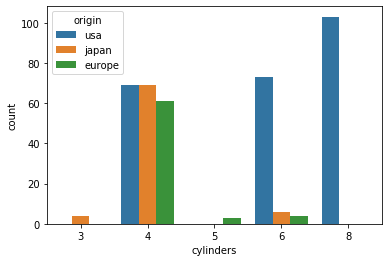

In [30]:
#now analyzing how different features behaves on changing other features
#bifurcating cylinder by origin
sns.countplot(x='cylinders',hue='origin',data=data_cat)

Insights by seeing the above graph:
1)Japan is the only country with 3 cylinder
2)Europe is the only country with 5 cylinder
3)USA is the only country with 8 cylinder
4)cylinder 4 has been equally distributed among all origin whereas cylinder 6 has been dominated by USA and other 2 origin comprises of very small of it.

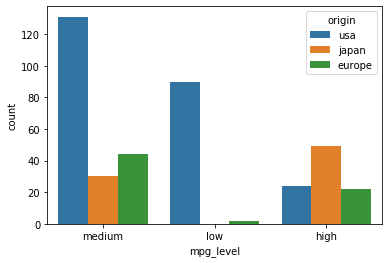

In [31]:
#bifurcating mpg_level by origin
sns.countplot(x='mpg_level',hue='origin',data=data_cat)

Insights by seeing the above graph:
1)medium and high level has been been distributed among all origins.
2)medium level has been dominated by USA whereas high level has been dominated by japan
3)japan don't have vehicle of low level whereas europe has almost negligible number of low level vehicle

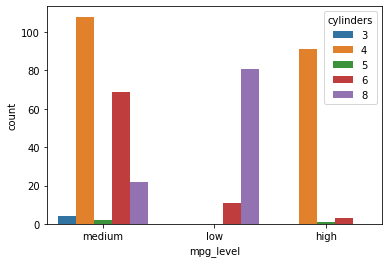

In [32]:
#bifurcating mpg_level by origin
sns.countplot(x='mpg_level',hue='cylinders',data=data_cat)

Insights by seeing the above graph:
1)medium and high level contains higher number of cylinder 4(because it is in large number)
2)low level does not have cylinder 3,4,5 whereas high level does not have 3 and 8
3)medium level have all the cylinder with max. of 4,6,8 due to fact that most vehicle contains these cylinders.

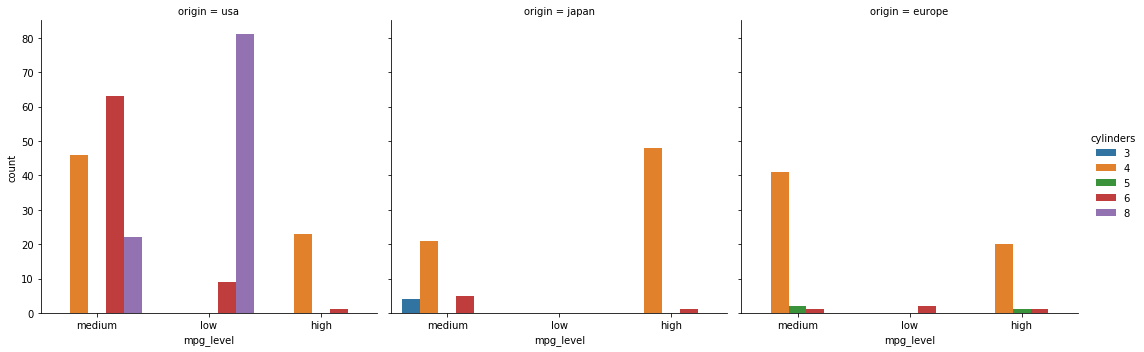

In [33]:
sns.catplot(x='mpg_level',hue='cylinders',col='origin',data=data_cat,kind='count')

Conclusion
1)Japan is winning as it has highest number of high mpglevel vehicle.
2)By seeing the above graphs I observe that as cylinders increases the mpg level decreases

In [34]:
#analyzing car company
top_15_car=data_cat['car_company'].value_counts()[0:15].index
top_15_car

Index(['ford', 'chevrolet', 'plymouth', 'dodge', 'amc', 'toyota', 'datsun',
       'buick', 'pontiac', 'volkswagen', 'honda', 'mercury', 'oldsmobile',
       'mazda', 'peugeot'],
      dtype='object')

In [35]:
data_cat_top_com=data_cat[data_cat['car_company'].isin(top_15_car)]
# data_cat['car_company'].isin(top_15_car)
data_cat_top_com.head()
# data_cat_top_com.shape

,origin,cylinders,model_year,mpg_level,car_company,car_name
0,usa,8,70,medium,chevrolet,chevelle malibu
1,usa,8,70,low,buick,skylark 320
2,usa,8,70,medium,plymouth,satellite
3,usa,8,70,low,amc,rebel sst
4,usa,8,70,medium,ford,torino


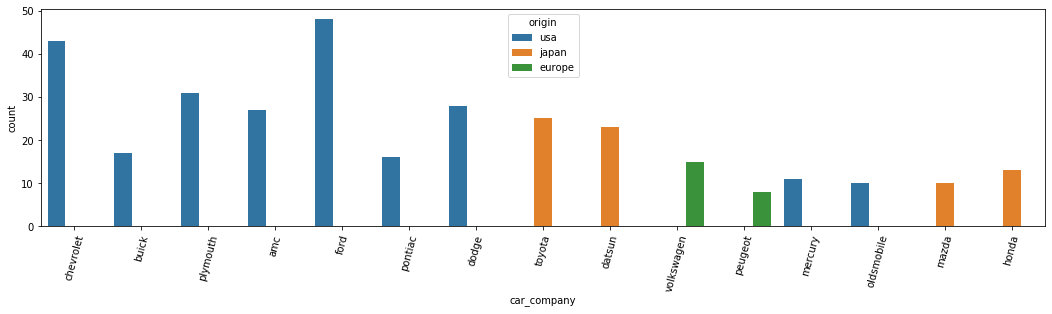

In [36]:
#plotting car names with origin
fig=plt.figure(1,(18,4))
ax1=plt.subplot(1,1,1)
sns.countplot(x='car_company',data=data_cat_top_com,hue='origin')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=75)
plt.show()

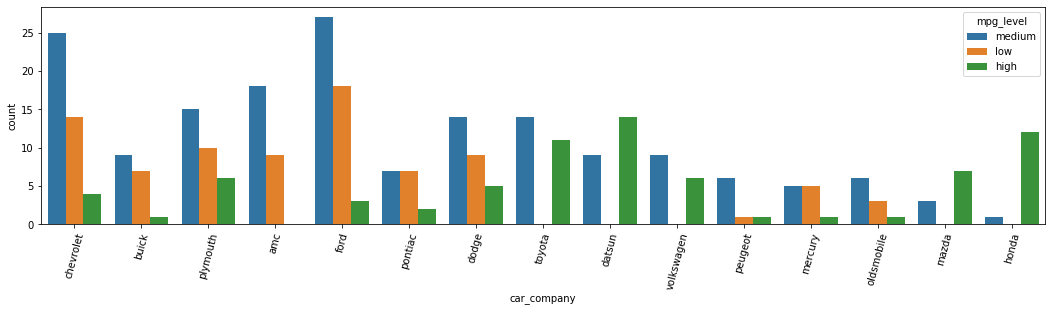

In [37]:
#plotting car names with mpg_levels
fig=plt.figure(1,(18,4))
ax1=plt.subplot(1,1,1)
sns.countplot(x='car_company',data=data_cat_top_com,hue='mpg_level')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=75)
plt.show()

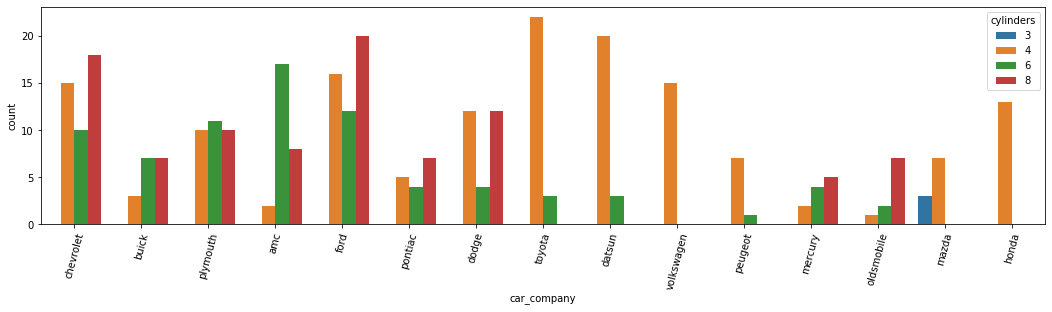

In [38]:
#plotting car names with cylinders
fig=plt.figure(1,(18,4))
ax1=plt.subplot(1,1,1)
sns.countplot(x='car_company',data=data_cat_top_com,hue='cylinders')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=75)
plt.show()

In [39]:
data = pd.concat((data_cat.loc[:, 'origin':'car_company'], data.loc[:, 'mpg':'acceleration']), axis=1)
data.head()

,origin,cylinders,model_year,mpg_level,car_company,mpg,displacement,horsepower,weight,acceleration
0,usa,8,70,medium,chevrolet,18.0,307.0,130.0,3504,12.0
1,usa,8,70,low,buick,15.0,350.0,165.0,3693,11.5
2,usa,8,70,medium,plymouth,18.0,318.0,150.0,3436,11.0
3,usa,8,70,low,amc,16.0,304.0,150.0,3433,12.0
4,usa,8,70,medium,ford,17.0,302.0,140.0,3449,10.5


In [40]:
#saving these above changes to new file
data.to_csv('mpg_after_cat.csv',index=False)

Analysis of Numerical Features

In [42]:
data=pd.read_csv('mpg_after_cat.csv')
data.head()

,origin,cylinders,model_year,mpg_level,car_company,mpg,displacement,horsepower,weight,acceleration
0,usa,8,70,medium,chevrolet,18.0,307.0,130.0,3504,12.0
1,usa,8,70,low,buick,15.0,350.0,165.0,3693,11.5
2,usa,8,70,medium,plymouth,18.0,318.0,150.0,3436,11.0
3,usa,8,70,low,amc,16.0,304.0,150.0,3433,12.0
4,usa,8,70,medium,ford,17.0,302.0,140.0,3449,10.5


In [46]:
#making separate dataframe for numerical feature
data_num=data.loc[:,'mpg':]
data_num.head()

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130.0,3504,12.0
1,15.0,350.0,165.0,3693,11.5
2,18.0,318.0,150.0,3436,11.0
3,16.0,304.0,150.0,3433,12.0
4,17.0,302.0,140.0,3449,10.5


In [47]:
data_num.describe()

,mpg,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327
std,7.805007,104.644004,38.491160,849.402560,2.758864
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


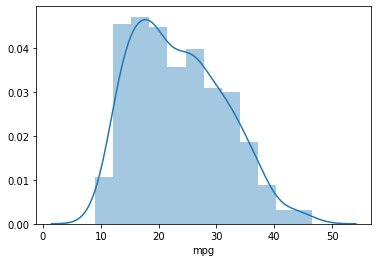

In [50]:
# plotting distribution for all the features
# 1)For mpg feature
sns.distplot(data_num['mpg'])

Distribution plot of mpg looks like right skewed gaussian distribution

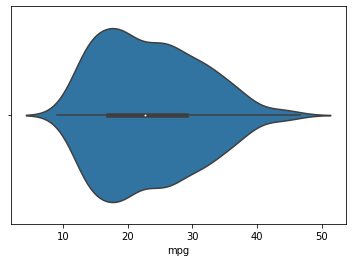

In [51]:
sns.violinplot(data_num['mpg'])

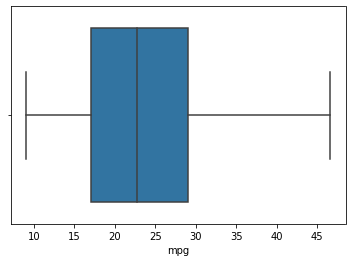

In [52]:
sns.boxplot(x='mpg',data=data_num)

The graph is very far from gaussian distribution


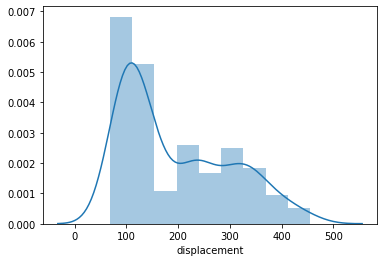

In [56]:
# 2)For displacement feature
sns.distplot(data_num['displacement'])
print('The graph is very far from gaussian distribution')

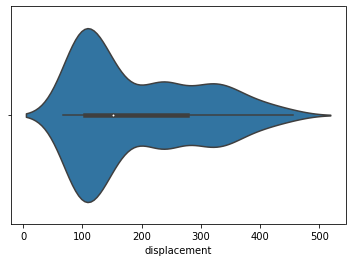

In [57]:
sns.violinplot(data_num['displacement'])

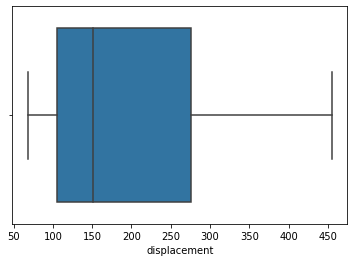

In [58]:
sns.boxplot(x='displacement',data=data_num)

It looks more likely to bi modal


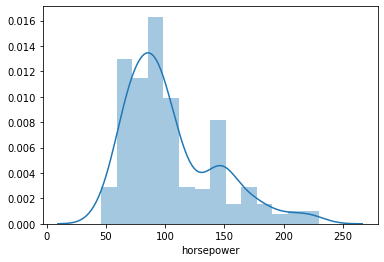

In [60]:
# 2)For horsepower feature
sns.distplot(data_num['horsepower'])
print("It looks more likely to bi modal")

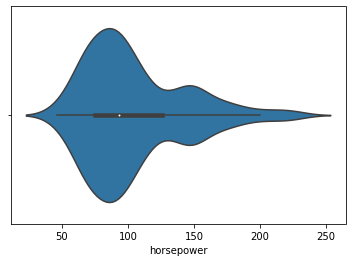

In [61]:
sns.violinplot(data_num['horsepower'])

It contains outlier


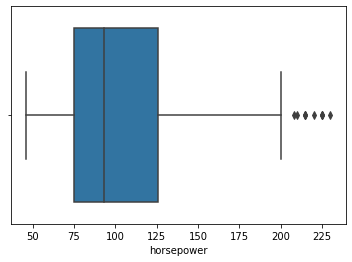

In [63]:
sns.boxplot(x='horsepower',data=data_num)
print('It contains outlier')

The graph perfectly follows gaussian distribution


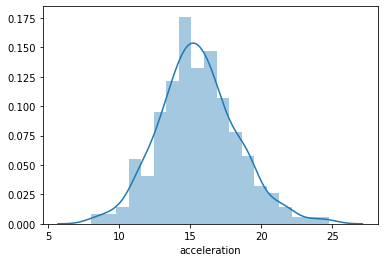

In [64]:
# 4)For  acceleration feature
sns.distplot(data_num['acceleration'])
print('The graph perfectly follows gaussian distribution')

This feature also contain outliers


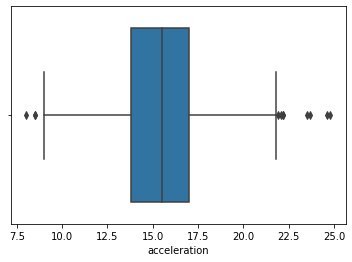

In [66]:
sns.boxplot(x='acceleration',data=data_num)
print('This feature also contain outliers')

Lets deal with all the outliers

In [78]:
def outlier(x):
    Q1=np.percentile(x,25)
    Q3=np.percentile(x,75)
    
    IQR=Q3-Q1
    lower_whisker=Q1-IQR*1.5
    upper_whisker=Q3+IQR*1.5
    outliers=x[(x<lower_whisker) | (x>upper_whisker)]
    return outliers

In [69]:
print('numerical features',num)

numerical features ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']


In [79]:
for col in num:
    outliers=outlier(data_num[col])
    if len(outliers):
        print(f"{col} has these outliers\n,{outliers}\n")
    else:
        print(f"{col} has no outliers\n")

mpg has no outliers

displacement has no outliers

horsepower has these outliers
,6      220.0
7      215.0
8      225.0
13     225.0
25     215.0
27     210.0
66     208.0
93     215.0
94     225.0
115    230.0
Name: horsepower, dtype: float64

weight has no outliers

acceleration has these outliers
,7       8.5
9       8.5
11      8.0
58     23.5
193    22.2
194    22.1
207    21.9
297    24.8
298    22.2
324    23.7
388    24.6
Name: acceleration, dtype: float64



In [80]:
data.iloc[list(outlier(data_num.acceleration).index)]

,origin,cylinders,model_year,mpg_level,car_company,mpg,displacement,horsepower,weight,acceleration
7,usa,8,70,low,plymouth,14.0,440.0,215.0,4312,8.5
9,usa,8,70,low,amc,15.0,390.0,190.0,3850,8.5
11,usa,8,70,low,plymouth,14.0,340.0,160.0,3609,8.0
58,europe,4,72,medium,volkswagen,23.0,97.0,54.0,2254,23.5
193,usa,4,76,medium,chevrolet,29.0,85.0,52.0,2035,22.2
194,usa,4,76,medium,chevrolet,24.5,98.0,60.0,2164,22.1
207,europe,4,76,medium,peugeot,19.0,120.0,88.0,3270,21.9
297,europe,4,79,medium,peugeot,27.2,141.0,71.0,3190,24.8
298,usa,8,79,medium,oldsmobile,23.9,260.0,90.0,3420,22.2
324,europe,4,80,high,vw,43.4,90.0,48.0,2335,23.7


In [81]:
data.iloc[list(outlier(data_num.horsepower).index)]

,origin,cylinders,model_year,mpg_level,car_company,mpg,displacement,horsepower,weight,acceleration
6,usa,8,70,low,chevrolet,14.0,454.0,220.0,4354,9.0
7,usa,8,70,low,plymouth,14.0,440.0,215.0,4312,8.5
8,usa,8,70,low,pontiac,14.0,455.0,225.0,4425,10.0
13,usa,8,70,low,buick,14.0,455.0,225.0,3086,10.0
25,usa,8,70,low,ford,10.0,360.0,215.0,4615,14.0
27,usa,8,70,low,dodge,11.0,318.0,210.0,4382,13.5
66,usa,8,72,low,mercury,11.0,429.0,208.0,4633,11.0
93,usa,8,73,low,chrysler,13.0,440.0,215.0,4735,11.0
94,usa,8,73,low,buick,12.0,455.0,225.0,4951,11.0
115,usa,8,73,low,pontiac,16.0,400.0,230.0,4278,9.5


Insights:
1)None of the outliers (whether it is from acceleration or horsepower )none of them are from japan.
2)Outliers from horsepower are somewhat conclusive as:
    i)all are from USA.
    ii)all has 8 cylinders
    iii)all has low mog
    iv) weight around 4000

Now analyzing relation between different numerical features

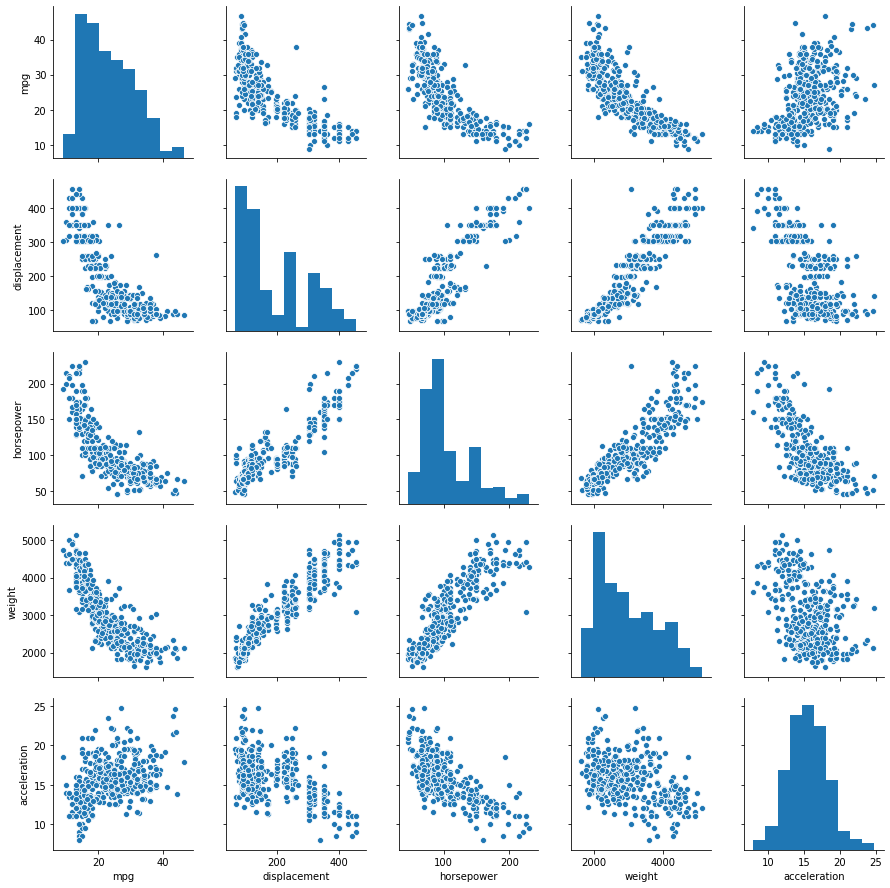

In [89]:
sns.pairplot(data_num)

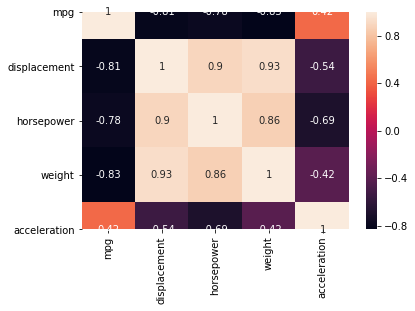

In [101]:
sns.heatmap(data_num.corr(),annot=True)

Insights:
1)as mpg increases displacement, horsepower & weight decreases but acceleration increases.
2)as horsepower increases displacement & weight increases but acceleration decreases.
3)as weight increases displacement increases but acceleration decreases.
4)as acceleration increases displacement decreases.

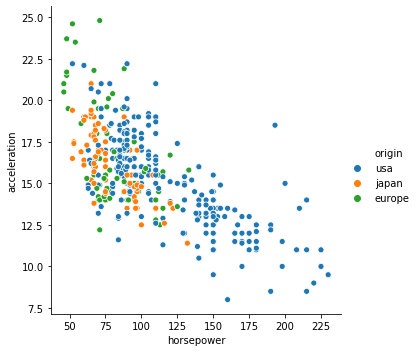

In [102]:
sns.relplot(x='horsepower',y='acceleration',hue='origin',data=data)

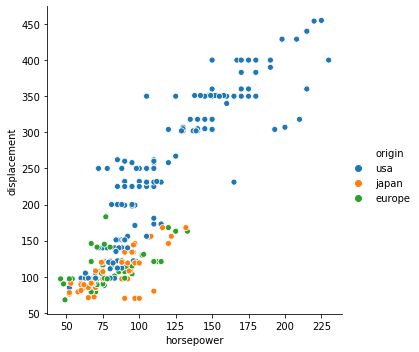

In [103]:
sns.relplot(x='horsepower',y='displacement',hue='origin',data=data)

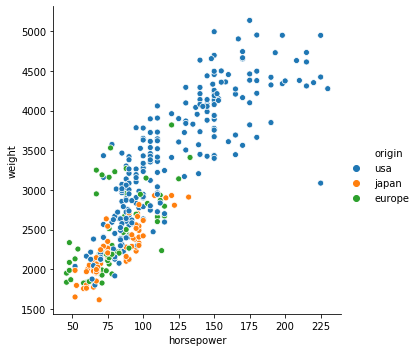

In [104]:
sns.relplot(x='horsepower',y='weight',hue='origin',data=data)

Let analyze relation between categorical and numerical features

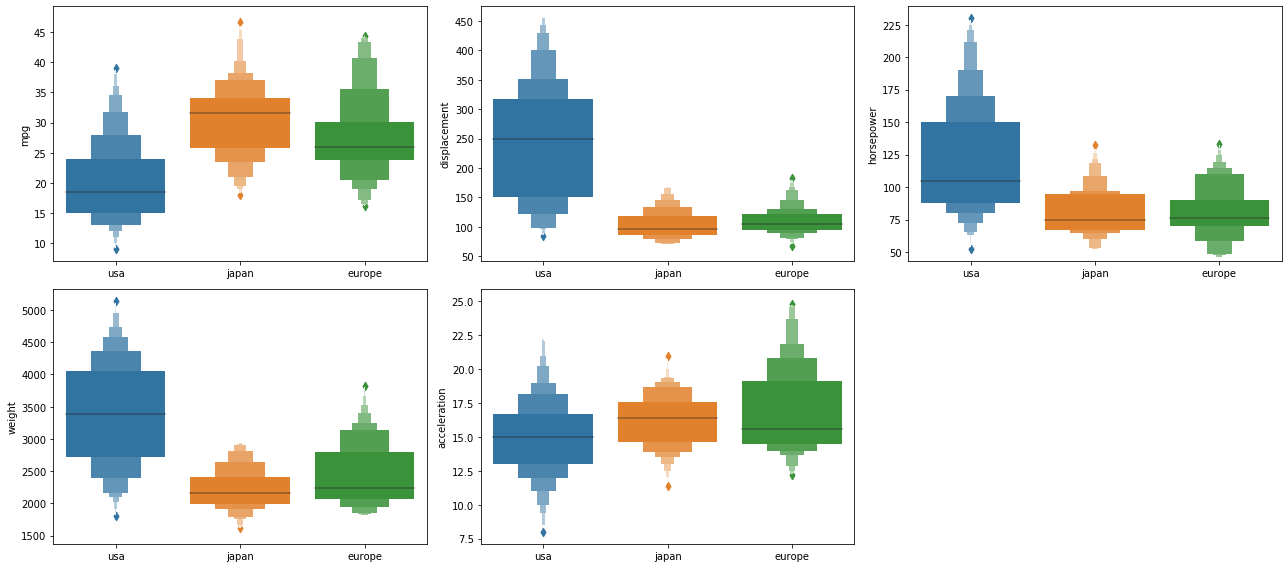

In [106]:
#analyzing mpgwith origin
fig=plt.figure(1,(18,8))
for i,col in enumerate(num):
    ax=plt.subplot(2,3,i+1)
    sns.boxenplot(x='origin',y=col,data=data)
    ax.set_xlabel(None)
    plt.tight_layout()

Insights:
1)vehicles of usa has less mpg on an average as compared to japan & europe.
2)vehicles of usa has more displacement, horsepower and weight as compared to japan & europe.
3)all vehicles has relatively same acceleration irrespective of the origin but distribution of acceleration from usa is more spreaded due to the fact that it comprises a lot vehicles compared to other.

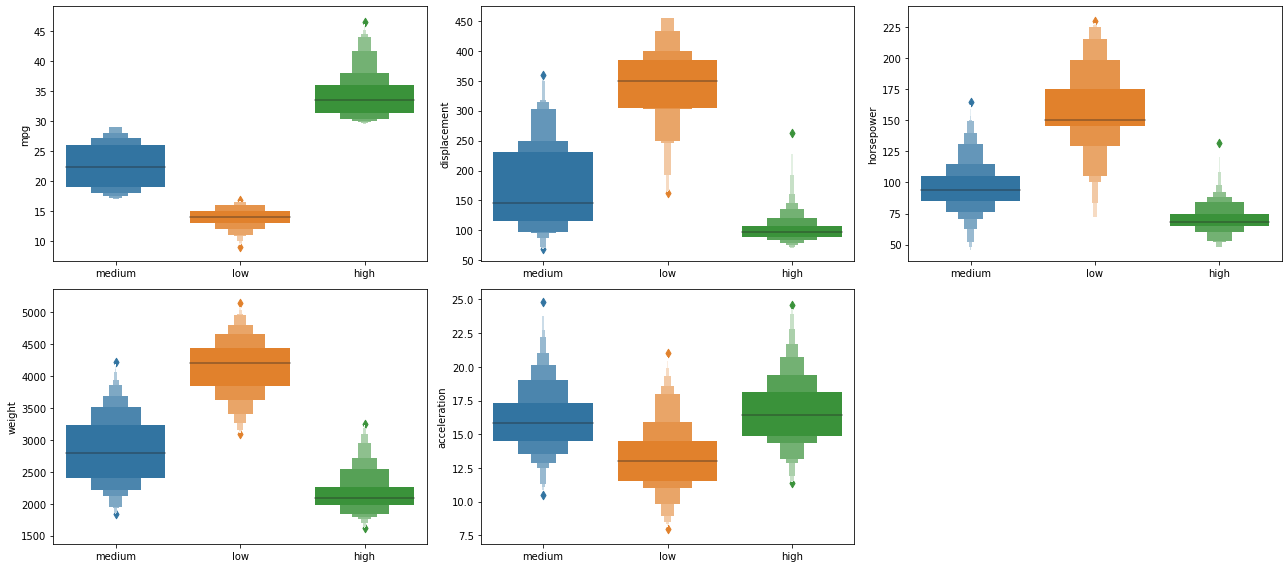

In [107]:
#analyzing mpg with mpg_level
fig=plt.figure(1,(18,8))
for i,col in enumerate(num):
    ax=plt.subplot(2,3,i+1)
    sns.boxenplot(x='mpg_level',y=col,data=data)
    ax.set_xlabel(None)
    plt.tight_layout()

Insights:
1)as mpg_level increases displacement decreases on average.
2)as mpg_level increases horsepower decreases on average.
3)as mpg_level increases weight decreases on average.
4)vehicles with low mpg_level usually has less acceleration compared to other whereas vehicles with medium and high mpg_level has same acceleration.

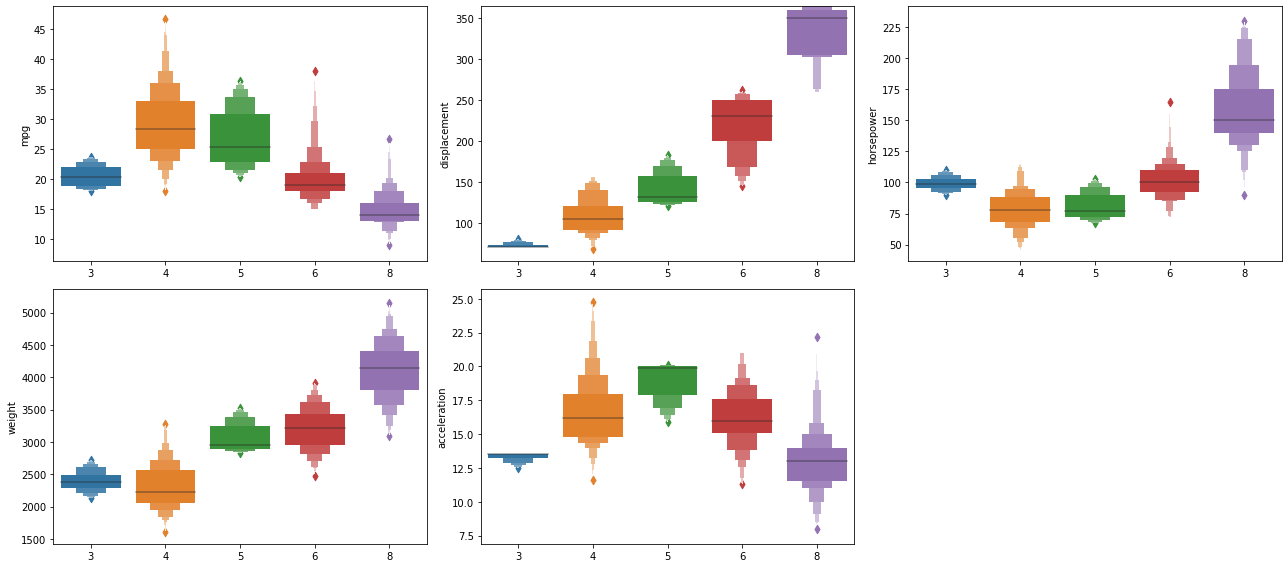

In [108]:
#analyzing mpg with cylinders
fig=plt.figure(1,(18,8))
for i,col in enumerate(num):
    ax=plt.subplot(2,3,i+1)
    sns.boxenplot(x='cylinders',y=col,data=data)
    ax.set_xlabel(None)
    plt.tight_layout()

Insights:
1)on increasing cylinders vehicle's weight increases on average (very obvious).
2)as cylinders increases from 3 to 4 mpg also increases but on further increasing the cylinders mpg starts decreasing.
3)displacement increases as exponentially as cylinders increases.
4)as cylinders increases from 3 to 5 horsepower decreases but on further increasing the cylinders it starts increasing.
5)as cylinders increases from 3 to 5 vehicle's acceleration also increases but on further increasing the cylinders it starts decreasing(may be due to increasing weight)